In [1]:
import data_io
from numpy import *
from classes.block import Block
from classes.triplet import Triplet
from classes.shot import Shot
import re
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data_io.loadAll("data")

Loading 2013AE.json
Loading 2013AO.json
Loading 2013BL.json
Loading 2014BH.json
Loading 2015AM.json
Loading 2015AP.json
Loading 2015BC.json
Loading 2015BD.json
Loading 2015BS.json
Loading 2015BT.json


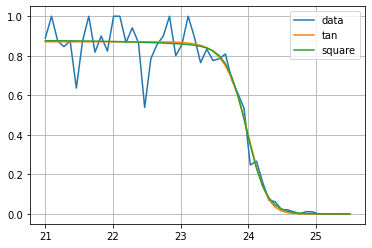

In [2]:
path = "H:/Lab_Project/Triplets/Split_triplets"

detected = []
undetected = []
with open(f"{path}/1615904.fake","r") as f:
    for line in f:
        if line.startswith("#"): continue
        data = line.split()
        if data[7] in ["--","0.000"]: 
            undetected.append(float(data[2]))
        else: detected.append(float(data[2]))

detected = array(detected)
undetected = array(undetected)

m,step = linspace(21,25.5,50, retstep=True)

eff = empty_like(m)

for i,x in enumerate(m):
    numDetected = sum((x - step/2 <= detected) * (detected < x + step/2))
    numUndetected = sum((x - step/2 <= undetected) * (undetected < x + step/2))
    if numDetected + numUndetected == 0: eff[i] = 0
    else: eff[i] = numDetected / (numDetected + numUndetected)

def ft(m,a,b,c,d):
    return a/4 * (1-tanh((m-b)/c)) * (1-tanh((m-b)/d))

def fs(m,a,b,c,d):
    return (a-b*(m-21)**2) / (1+exp((m-c)/d))

param = [0.5,21,0.5,0.5]
paramft = curve_fit(ft,m,eff,param)

param = [0.5,0.5,21,0.5]
paramfs = curve_fit(fs,m,eff,param)

plt.plot(m,eff,label="data")
plt.plot(m,ft(m,*paramft[0]),label="tan")
plt.plot(m,fs(m,*paramfs[0]),label="square")
plt.legend()
plt.grid()
plt.show()


In [3]:
import interface

for _, triplet in Triplet.all.items():
    interface.loadTriplet(triplet)

data_io.saveAll(indent=None)